### Bernoulli Naive Bayes

Bernoulli naive bayes is performed on a clinical data set with patient demographics and tumor attributes. The label is the survival status of the patient, and the bernoulli-type features are tumor type (recurrent vs primary), patient gender, chemotherapy stauts, radiation status, methylation status, codeletion status, mutation status

#### Step 1: Data Prep

Non-bernoulii features are dropped and several features can be bernoulli but need to be encoded first.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder

In [2]:
## load data and examine head of data
import pandas as pd
filename = "cleaned_cgga_693_clinical.csv"
df = pd.read_csv(filename)
df.head()

,sample_id,tumor_type,tumor_histology,tumor_grade,gender,age,survival_days,survival_status,radio_status,chemo_status,mutation_status,codeletion_status
0,1002,P,anaplastic astrocyma,3,F,43.0,305.0,1.0,1.0,1.0,Wildtype,Non-codel
1,1003,P,oligodendroglioma,2,F,47.0,3817.0,0.0,0.0,1.0,Mutant,Codel
2,1010,P,astrocytoma,2,M,45.0,246.0,1.0,1.0,1.0,Mutant,Non-codel
3,1012,R,oligodendroglioma,2,M,45.0,3679.0,1.0,1.0,1.0,Mutant,Non-codel
4,1014,P,astrocytoma,2,M,42.0,263.0,1.0,0.0,1.0,Wildtype,Non-codel


In [3]:
# drop non bernoulli and unnecessary columns data
df = df.drop(columns=['sample_id','survival_days', 'tumor_histology','tumor_grade','age'])
df.head()

,tumor_type,gender,survival_status,radio_status,chemo_status,mutation_status,codeletion_status
0,P,F,1.0,1.0,1.0,Wildtype,Non-codel
1,P,F,0.0,0.0,1.0,Mutant,Codel
2,P,M,1.0,1.0,1.0,Mutant,Non-codel
3,R,M,1.0,1.0,1.0,Mutant,Non-codel
4,P,M,1.0,0.0,1.0,Wildtype,Non-codel


In [4]:
# encode features with two categories as bernoulli values
tumor_type=["P","R"]

gender = ['F','M']

mutation_status = ['Wildtype', 'Mutant']

codeletion_status = ['Non-codel', 'Codel']

MyOrdEncoder=OrdinalEncoder(categories=[tumor_type])
df["tumor_type"]=MyOrdEncoder.fit_transform(df[["tumor_type"]])



MyOrdEncoder=OrdinalEncoder(categories=[gender])
df["gender"]=MyOrdEncoder.fit_transform(df[["gender"]])


MyOrdEncoder=OrdinalEncoder(categories=[mutation_status])
df["mutation_status"]=MyOrdEncoder.fit_transform(df[["mutation_status"]])

MyOrdEncoder=OrdinalEncoder(categories=[codeletion_status])
df["codeletion_status"]=MyOrdEncoder.fit_transform(df[["codeletion_status"]])

df.head()

,tumor_type,gender,survival_status,radio_status,chemo_status,mutation_status,codeletion_status
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0


### Step 2: Split data into training and testing

In [5]:
training, testing = train_test_split(df, test_size=.3)
##  Save the Labels and then remove them from the Training and Testing data
training_label = training["survival_status"]
training=training.drop(["survival_status"], axis=1)
testing_label = testing["survival_status"]
testing=testing.drop(["survival_status"], axis=1)
print("Testing:", testing)

Testing:      tumor_type  gender  radio_status  chemo_status  mutation_status  \
244         0.0     0.0           0.0           0.0              0.0   
143         0.0     1.0           1.0           1.0              0.0   
297         0.0     0.0           1.0           1.0              1.0   
49          0.0     1.0           1.0           1.0              1.0   
322         0.0     1.0           1.0           0.0              1.0   
..          ...     ...           ...           ...              ...   
523         0.0     1.0           1.0           0.0              1.0   
438         0.0     1.0           1.0           0.0              1.0   
217         0.0     1.0           1.0           1.0              1.0   
474         1.0     0.0           1.0           1.0              0.0   
289         1.0     1.0           0.0           1.0              0.0   

     codeletion_status  
244                0.0  
143                0.0  
297                1.0  
49                 1.0  
3

In [6]:
print("Testing labels:", testing_label)

Testing labels: 244    0.0
143    1.0
297    0.0
49     0.0
322    0.0
      ... 
523    0.0
438    1.0
217    0.0
474    0.0
289    1.0
Name: survival_status, Length: 185, dtype: float64


In [8]:
testing.head()

,tumor_type,gender,radio_status,chemo_status,mutation_status,codeletion_status
244,0.0,0.0,0.0,0.0,0.0,0.0
143,0.0,1.0,1.0,1.0,0.0,0.0
297,0.0,0.0,1.0,1.0,1.0,1.0
49,0.0,1.0,1.0,1.0,1.0,1.0
322,0.0,1.0,1.0,0.0,1.0,1.0


In [9]:
training.head()

,tumor_type,gender,radio_status,chemo_status,mutation_status,codeletion_status
481,0.0,0.0,1.0,0.0,1.0,0.0
423,1.0,0.0,1.0,1.0,0.0,0.0
570,1.0,1.0,1.0,1.0,0.0,0.0
184,1.0,0.0,1.0,1.0,1.0,1.0
429,0.0,0.0,1.0,0.0,1.0,1.0


#### Step 3: Run Bernoulli NB and produce confusion matrix

     tumor_type  gender  radio_status  chemo_status  mutation_status  \
481         0.0     0.0           1.0           0.0              1.0   
423         1.0     0.0           1.0           1.0              0.0   
570         1.0     1.0           1.0           1.0              0.0   
184         1.0     0.0           1.0           1.0              1.0   
429         0.0     0.0           1.0           0.0              1.0   
..          ...     ...           ...           ...              ...   
257         1.0     1.0           1.0           0.0              1.0   
188         0.0     1.0           1.0           1.0              0.0   
298         0.0     0.0           0.0           0.0              0.0   
545         1.0     0.0           1.0           1.0              0.0   
585         1.0     1.0           1.0           1.0              0.0   

     codeletion_status  
481                0.0  
423                0.0  
570                0.0  
184                1.0  
429       

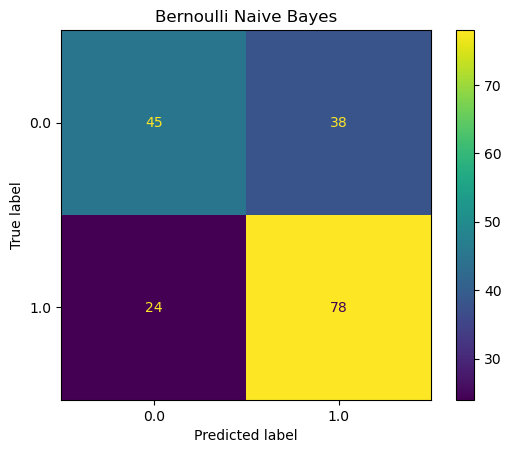

In [7]:
MyBNB = BernoulliNB()
print(training)
print(training_label)
## Training the model
My_BNB_Model = MyBNB.fit(training, training_label)
print(My_BNB_Model)
print(My_BNB_Model.classes_)

## Predict the Testing Data using the model
Predictions_B=My_BNB_Model.predict(testing)
print(Predictions_B)

## Print the actual probabilities
print("The Bernoulli NB Model Prediction Probabilities are:")
print(My_BNB_Model.predict_proba(testing).round(3))

## Confusion Matrix
CM_B = confusion_matrix(testing_label, Predictions_B)
print(CM_B)
## Pretty confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=CM_B,display_labels=My_BNB_Model.classes_)
disp.plot()
plt.title("Bernoulli Naive Bayes")
plt.show()